In [79]:
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score as R2
from tqdm import tqdm

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor

In [2]:
tips = sns.load_dataset("tips")

# Análise Exploratória

<AxesSubplot:>

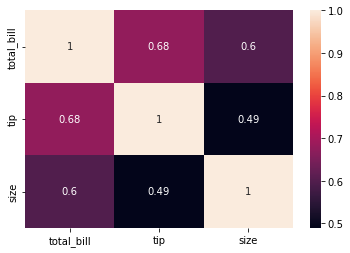

In [18]:
sns.heatmap(tips.select_dtypes(include = np.number).corr(),annot= True)

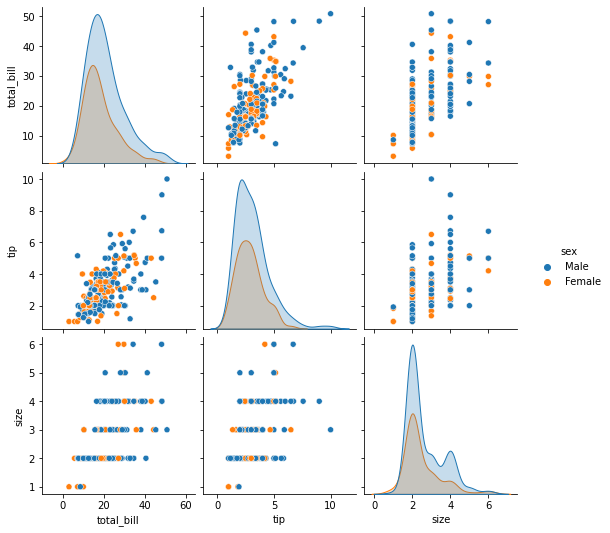

In [17]:
sns.pairplot(tips,hue = 'sex')

# Regressão Linear

In [102]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [16]:
data = tips.select_dtypes(include = np.number).drop('size',axis = 1)
data

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [91]:
y = data['tip'].values
X = data['total_bill'].values

In [94]:
R2_list_lr = []
coefs = []
for i in tqdm(range(1000)):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33)
    reg = LinearRegression().fit(X_train.reshape(-1,1), y_train.reshape(-1,1))
    coefs.append(reg.coef_)
    metric = R2(y_test.reshape(-1,1),reg.predict(X_test.reshape(-1,1)))
    R2_list_lr.append(metric)

100%|██████████████████████████████████████| 1000/1000 [00:01<00:00, 997.65it/s]


0.10537966690863224


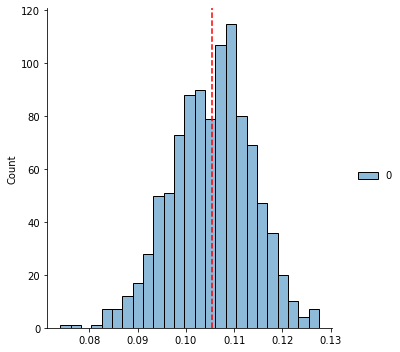

In [101]:
sns.displot(np.vstack(coefs))
plt.axvline(np.mean(np.vstack(coefs)),ls = '--',color = 'red')
print(np.mean(np.vstack(coefs)))

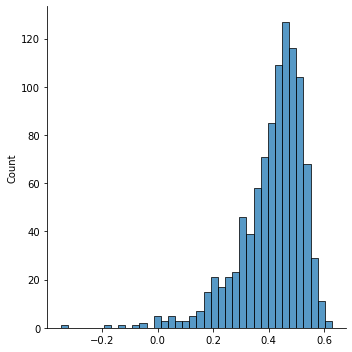

In [77]:
sns.displot(R2_list_lr)

Text(0.5, 0, 'R2')

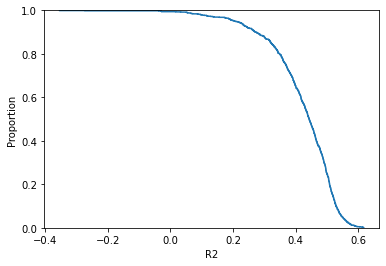

In [53]:
sns.ecdfplot(R2_list,complementary=True)
plt.xlabel('R2')

# LightGBM

In [48]:
data = tips.select_dtypes(include = np.number)
data

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [57]:
X = data[['total_bill','size']].values
y = data['tip'].values

In [71]:
R2_list = []
for i in tqdm(range(1000)):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33)
    reg = LGBMRegressor()
    reg.fit(X_train, y_train)
    metric = R2(y_test,reg.predict(X_test))
    R2_list.append(metric)

100%|███████████████████████████████████████| 1000/1000 [01:02<00:00, 15.87it/s]


In [73]:
np.mean(R2_list)

0.34849831168648493

In [66]:
reg = LGBMRegressor()

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33)

In [68]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((163, 2), (81, 2), (163,), (81,))

In [70]:
reg.fit(X_train,y_train)

LGBMRegressor()

In [80]:
comparison = pd.DataFrame({'LGBM':R2_list,'LR':R2_list_lr})

<AxesSubplot:>

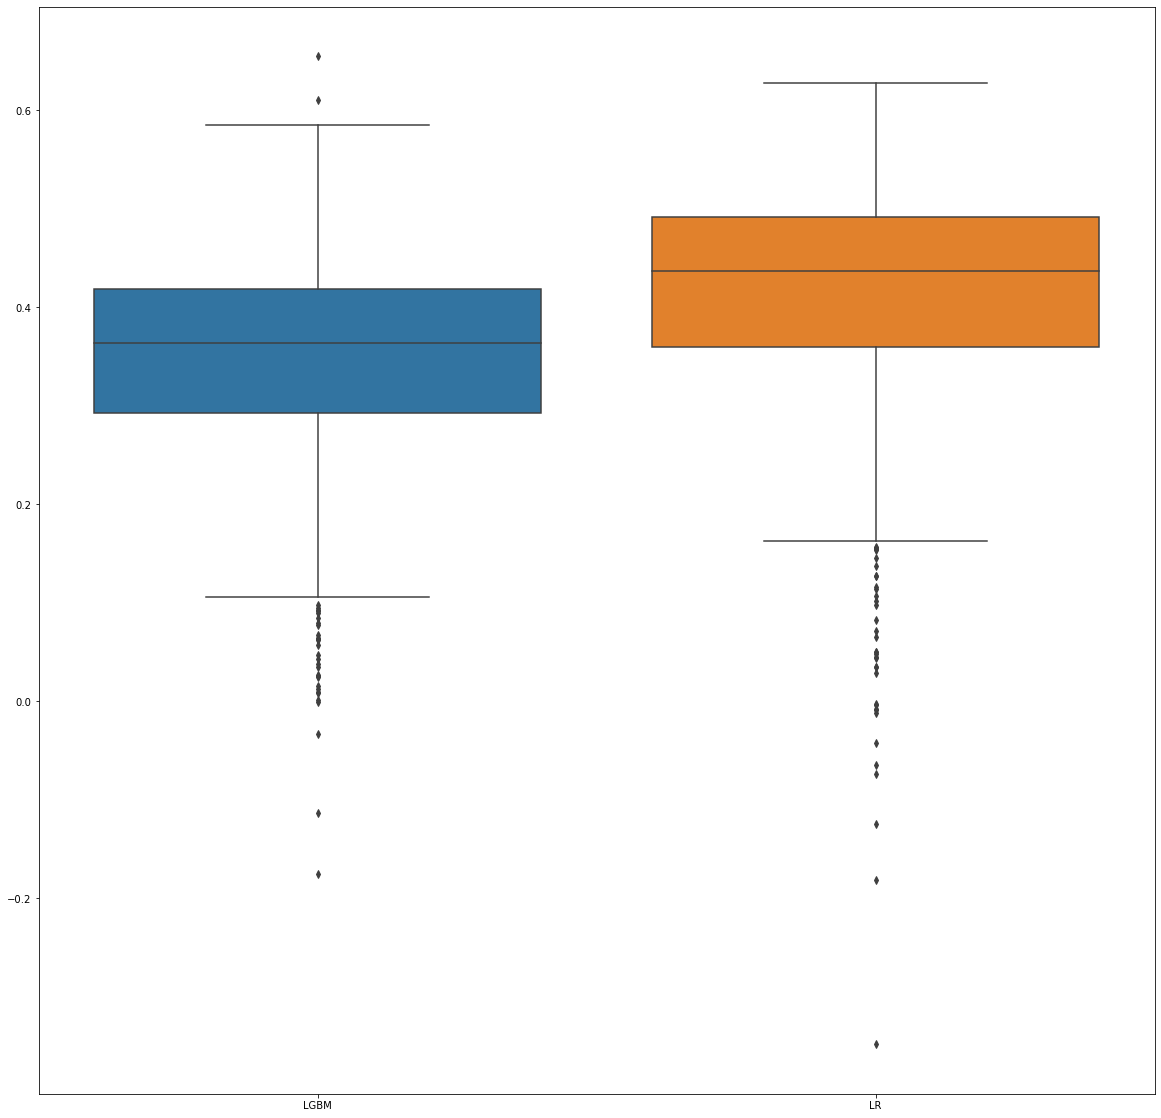

In [85]:
fig = plt.figure(figsize = (20,20))
sns.boxplot(data = comparison)

<AxesSubplot:ylabel='Proportion'>

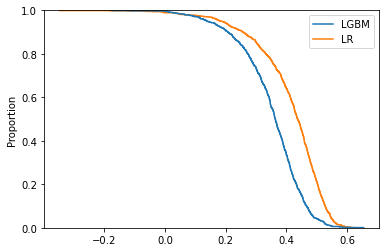

In [87]:
sns.ecdfplot(data = comparison,complementary=True)

<AxesSubplot:ylabel='Density'>

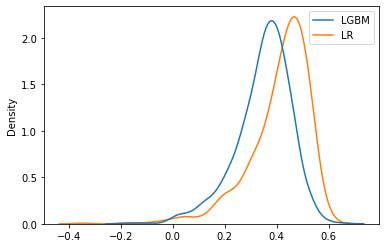

In [89]:
sns.kdeplot(data = comparison)